<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/6310505688_hw_4_2_Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

##**1. Importing dataset**

- Explain the business objective(s)
  - Loan Approval Prediction
  - The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.


- Give reference link to your data come from?

https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

- Explain details of your importing steps

In [168]:
# Upload files
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


- Give link to your dataset

https://drive.google.com/file/d/14HjcFlriMQHhW-RvER-uPZRPBmB7pbZe/view

##**2. Exploring dataset**

In [169]:
# Loading the data from csv file to Pandas dataframe
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [170]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [171]:
# - Give summary statistics of your dataset (Numerical Columns)
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [172]:
# - Give summary statistics of your dataset
df.describe(include="all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [173]:
# - Explain meaning of each attribute? And also the target attribute
'''
loan_id คือ unique ID สำหรับผู้สมัครแต่ละคน
no_of_dependents คือ Number of Dependents of the Applicant - จำนวนผู้อยู่ในอุปการะของผู้สมัคร
education คือ Education of the Applicant - การศึกษาของผู้สมัคร
self_employed คือ Employment Status of the Applicant - สถานะการจ้างงานของผู้สมัคร
income_annum คือ Annual Income of the Applicant - รายได้ต่อปีของผู้สมัคร
loan_amount คือ Loan Amount - วงเงินกู้
loan_term คือ Loan Term in Years - ระยะเวลาเงินกู้ในปี
cibil_score คือ Credit Score - คะแนนเครดิต
residential_assets_value คือ มูลค่าสินทรัพย์ที่อยู่อาศัย
commercial_assets_value คือ มูลค่าสินทรัพย์เชิงพาณิชย์
luxury_assets_value คือ มูลค่าสินทรัพย์หรูหรา
bank_asset_value คือ มูลค่าทรัพย์สินของธนาคาร
loan_status คือ สถานะการให้เงินกู้ (อนุมัติ หรือ ปฏิเสธ)

target attribute คือ loan_status
'''

'\nloan_id คือ unique ID สำหรับผู้สมัครแต่ละคน\nno_of_dependents คือ Number of Dependents of the Applicant - จำนวนผู้อยู่ในอุปการะของผู้สมัคร\neducation คือ Education of the Applicant - การศึกษาของผู้สมัคร\nself_employed คือ Employment Status of the Applicant - สถานะการจ้างงานของผู้สมัคร\nincome_annum คือ Annual Income of the Applicant - รายได้ต่อปีของผู้สมัคร\nloan_amount คือ Loan Amount - วงเงินกู้\nloan_term คือ Loan Term in Years - ระยะเวลาเงินกู้ในปี\ncibil_score คือ Credit Score - คะแนนเครดิต\nresidential_assets_value คือ มูลค่าสินทรัพย์ที่อยู่อาศัย\ncommercial_assets_value คือ มูลค่าสินทรัพย์เชิงพาณิชย์\nluxury_assets_value คือ มูลค่าสินทรัพย์หรูหรา\nbank_asset_value คือ มูลค่าทรัพย์สินของธนาคาร\nloan_status คือ สถานะการให้เงินกู้ (อนุมัติ หรือ ปฏิเสธ)\n\ntarget attribute คือ loan_status\n'

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [175]:
for feature in df.columns:
  print(feature)

loan_id
 no_of_dependents
 education
 self_employed
 income_annum
 loan_amount
 loan_term
 cibil_score
 residential_assets_value
 commercial_assets_value
 luxury_assets_value
 bank_asset_value
 loan_status


In [176]:
# Removing space in column name
df.columns = df.columns.str.strip()

In [177]:
# Extracting numerical and categorical features
Categorical_Columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical Columns:\n {}'.format(Categorical_Columns))

Numerical_Columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical Columns:\n {}'.format(Numerical_Columns))

Categorical Columns:
 ['education', 'self_employed', 'loan_status']
Numerical Columns:
 ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


###**Categorical Features**

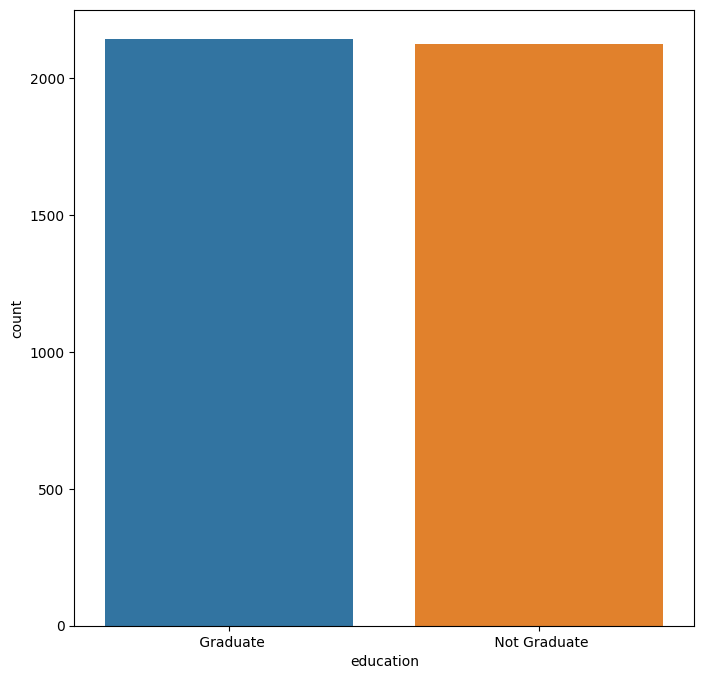

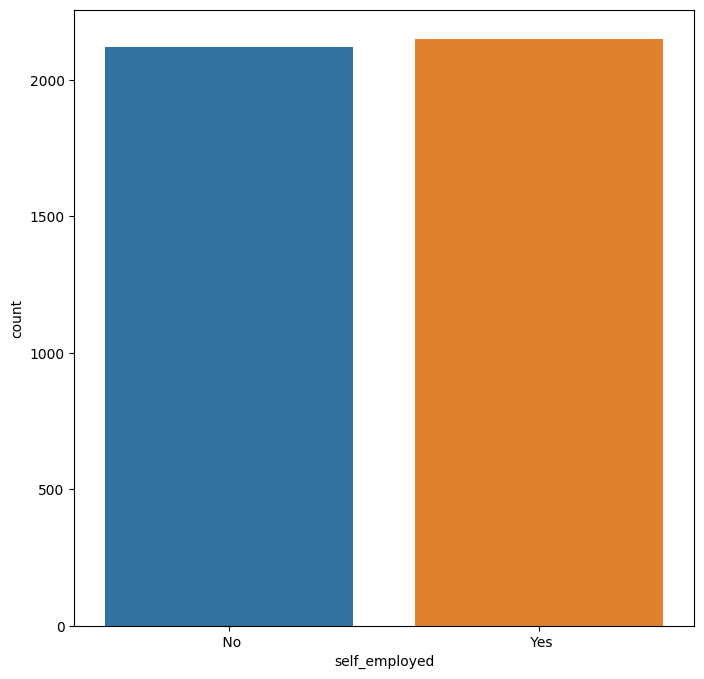

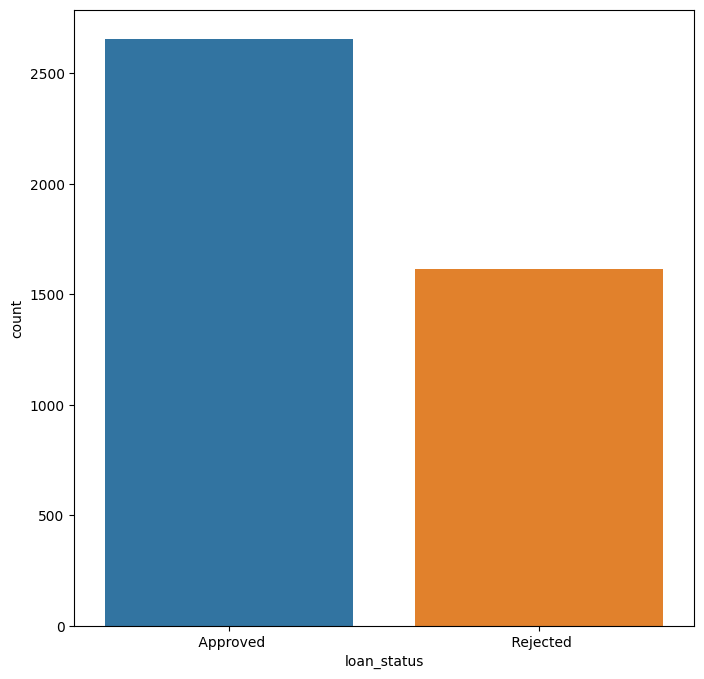

In [178]:
# Categorical Columns
for feature in Categorical_Columns:
  plt.figure(figsize=(8,8))
  sns.countplot(x = feature, data = df)
  plt.show()
  print()

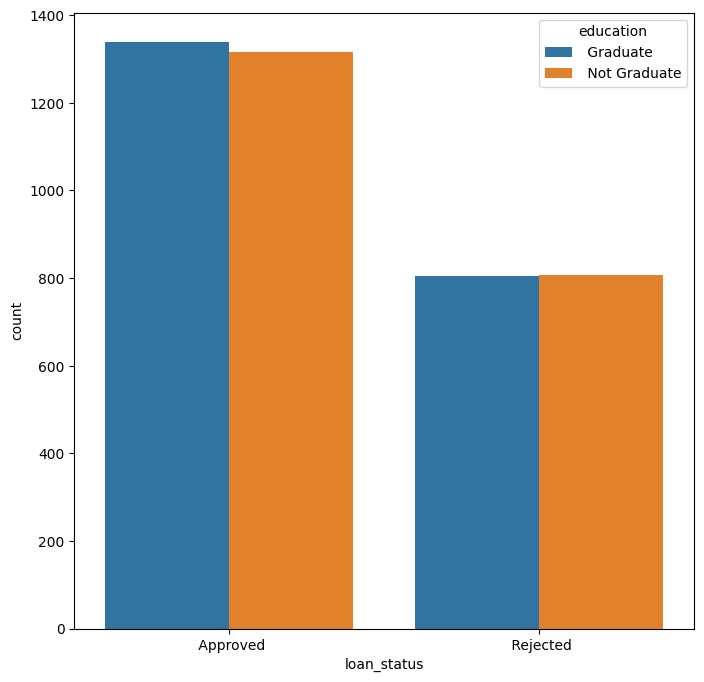

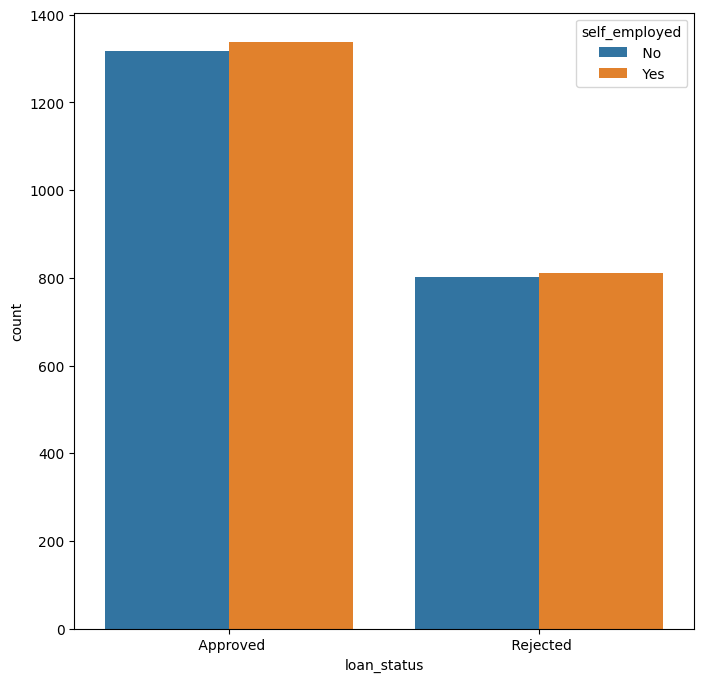

In [179]:
# For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable.
for feature in Categorical_Columns:
  if feature == "loan_status": continue
  plt.figure(figsize=(8,8))
  sns.countplot(data=df, x = df['loan_status'], hue = feature)
  plt.show()
  print()

###**Numerical Features**

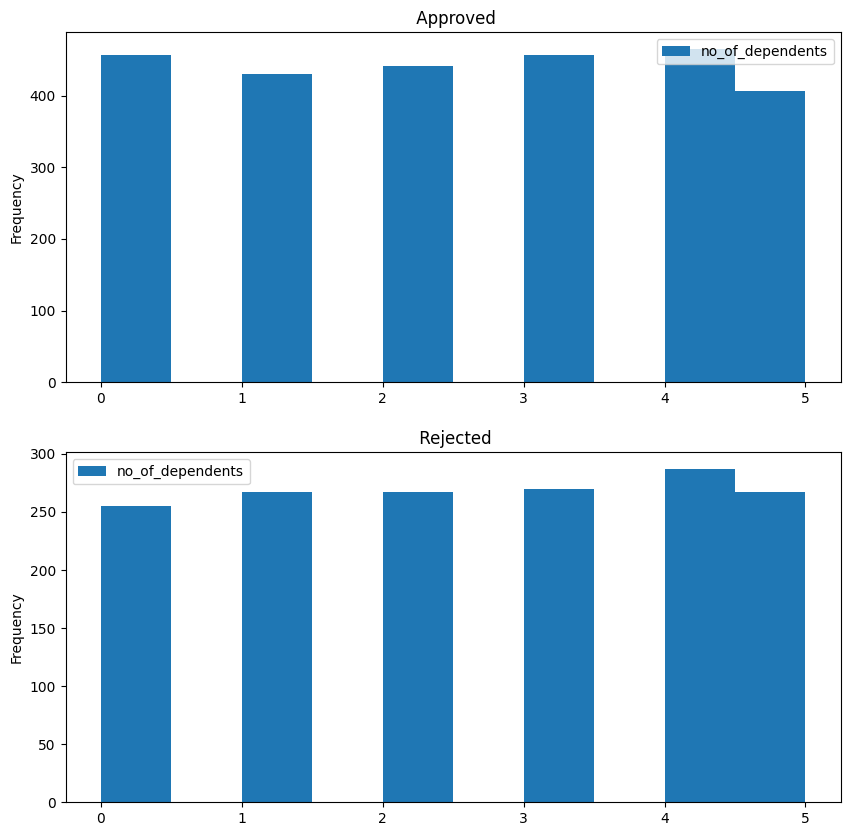

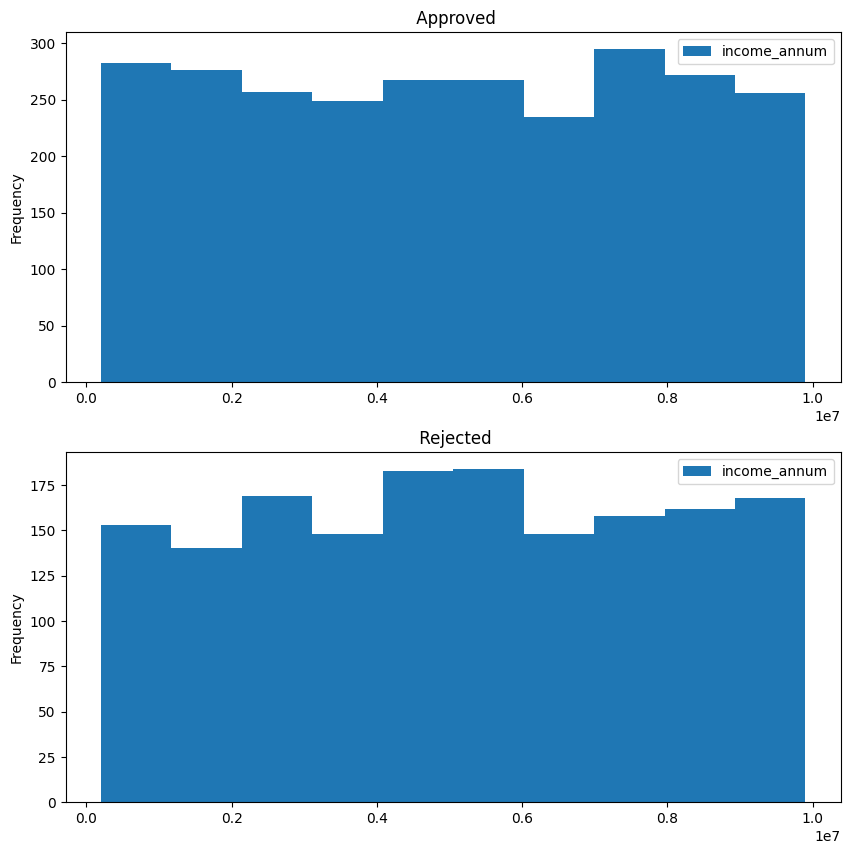

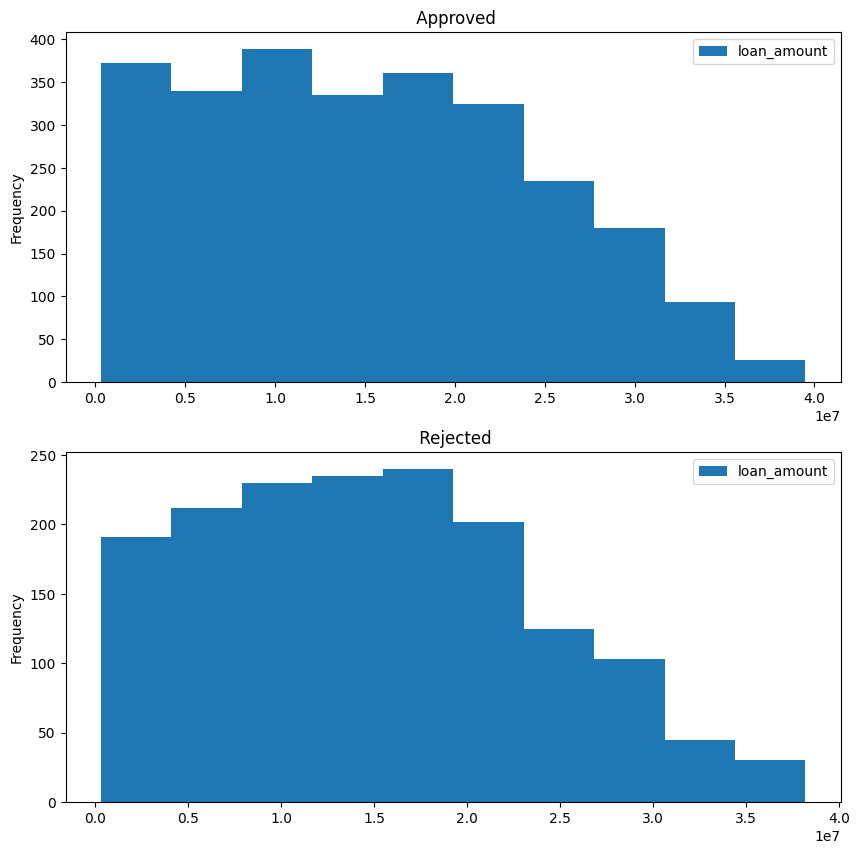

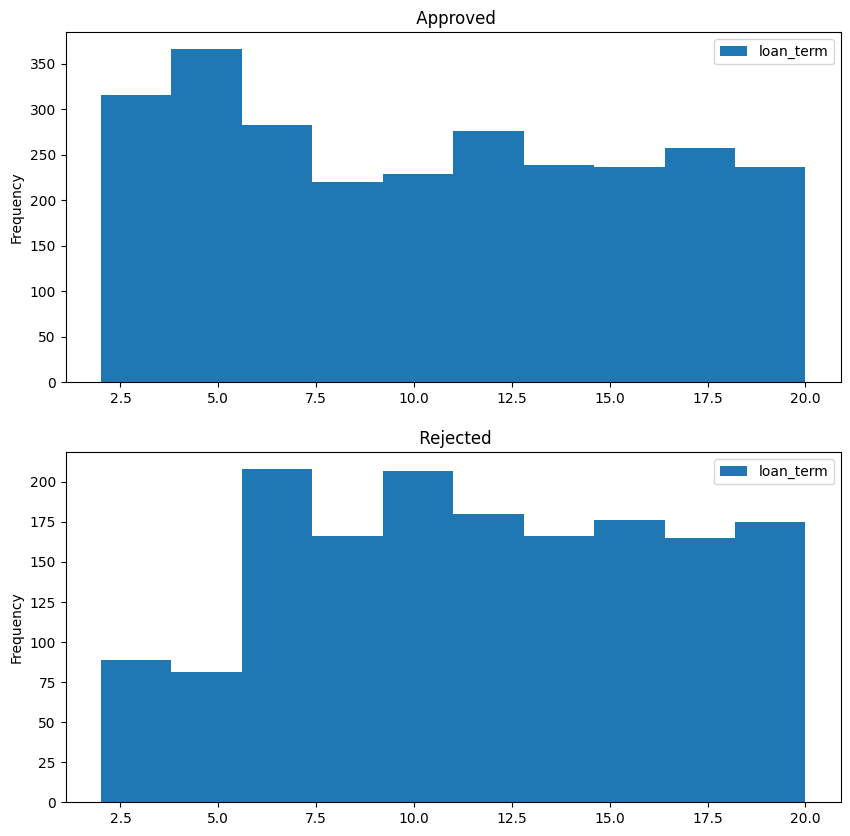

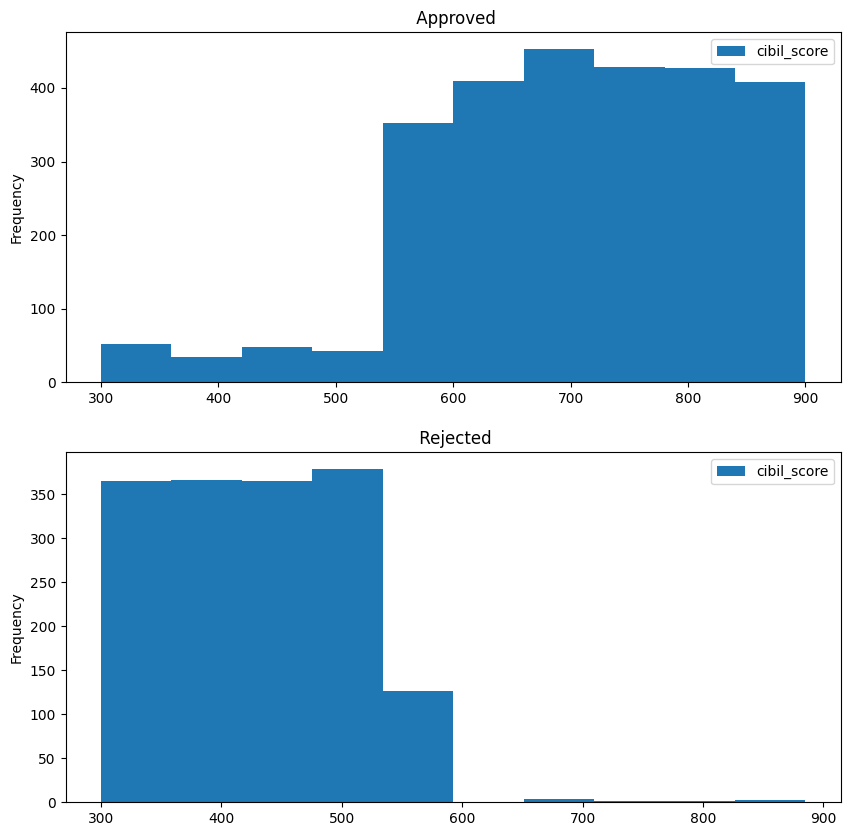

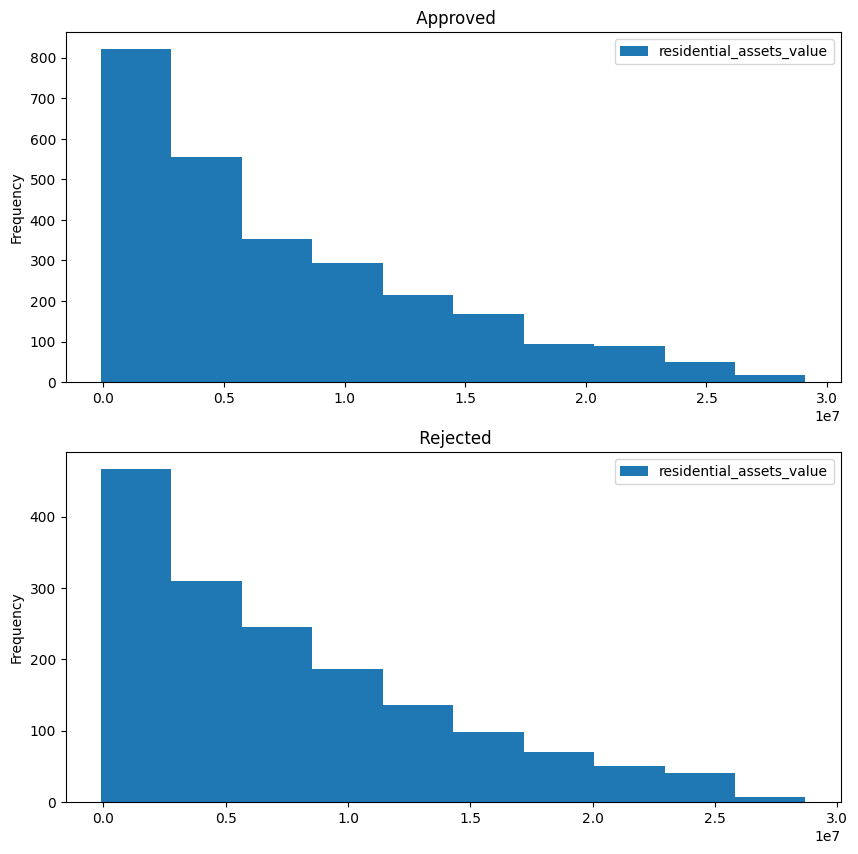

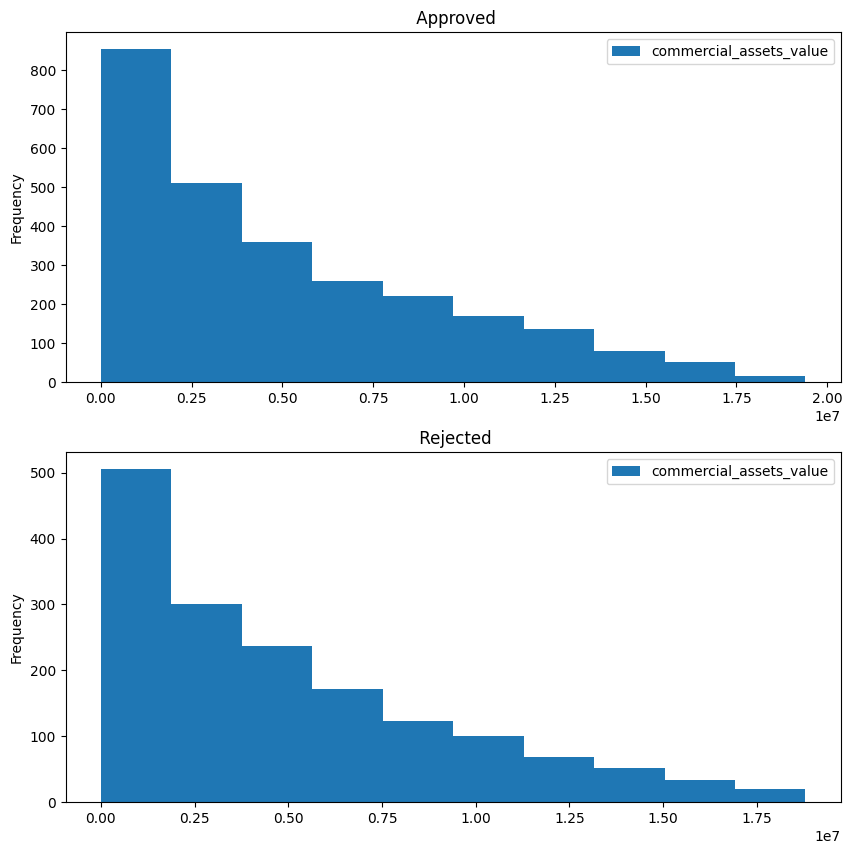

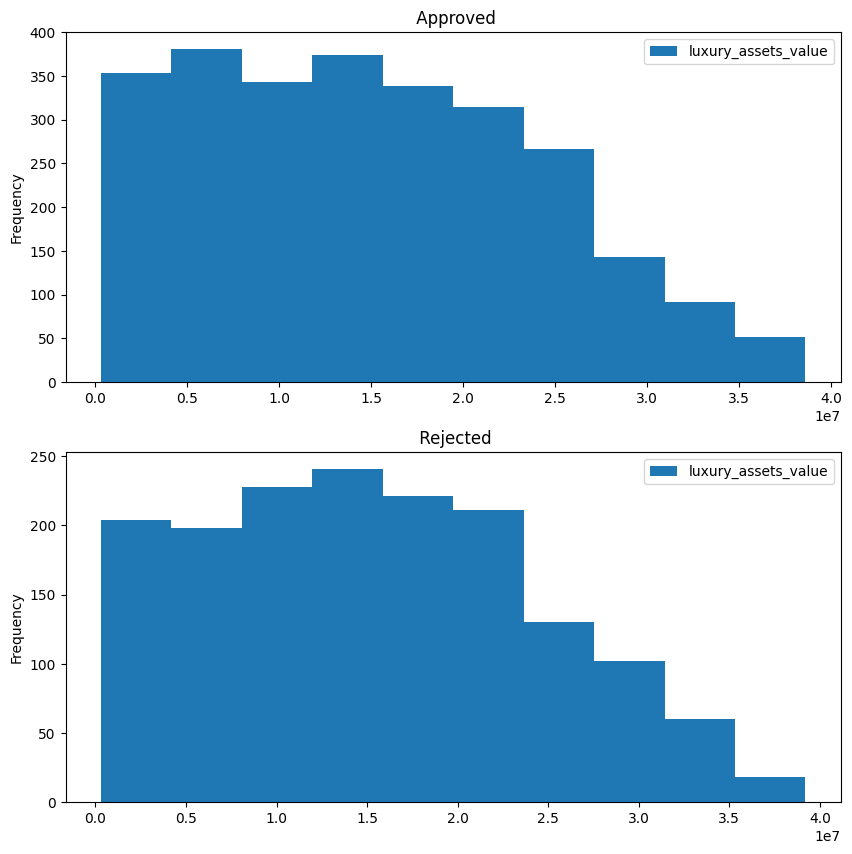

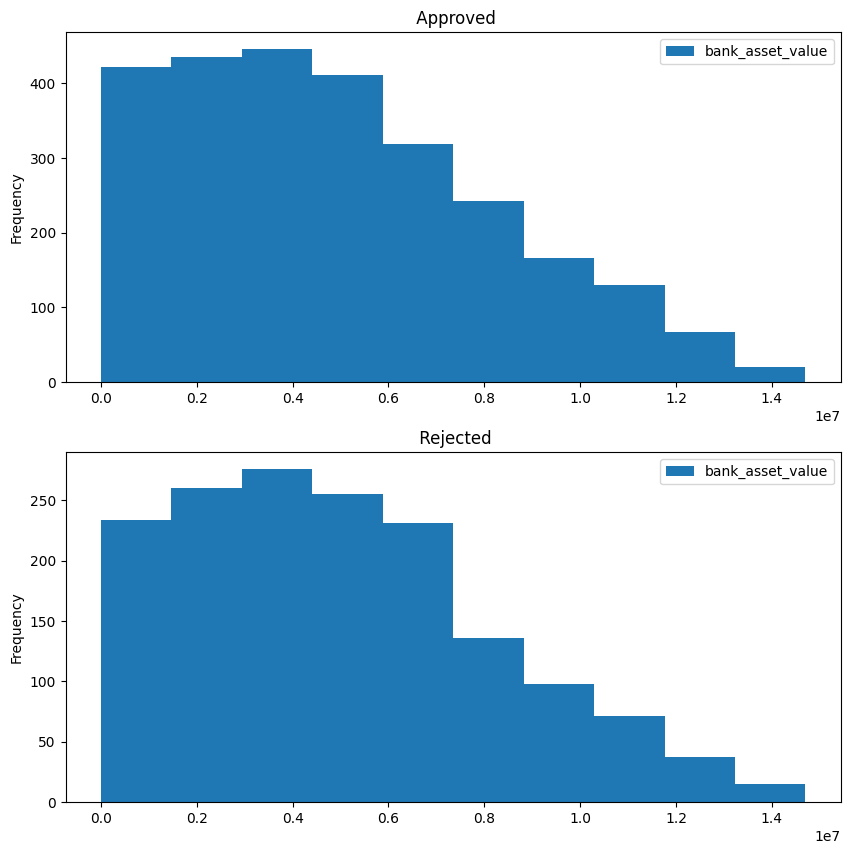

In [180]:
# Construct a histogram of each numerical variables, with an overlay of the target variable.
for feature in Numerical_Columns:
  if feature == "loan_id": continue
  df.plot.hist(column=feature, by="loan_status", figsize=(10, 10))

In [181]:
Numerical_Columns.remove("loan_id")

### **Distribution Plot**

In [182]:
print(Numerical_Columns)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


<ipython-input-183-36f1b9538ddd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no_of_dependents'])


<Axes: xlabel='no_of_dependents', ylabel='Density'>

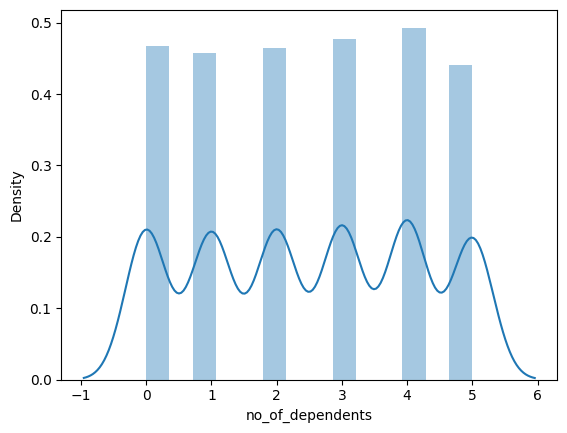

In [183]:
# Showing the distribution of "no_of_dependents" Column
sns.distplot(df['no_of_dependents'])

<ipython-input-184-845d6544f5e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income_annum'])


<Axes: xlabel='income_annum', ylabel='Density'>

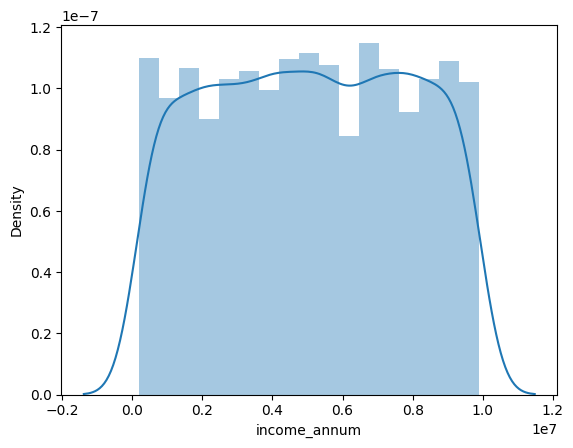

In [184]:
# Showing the distribution of "income_annum" Column
sns.distplot(df['income_annum'])

<ipython-input-185-677bba2a5b1c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

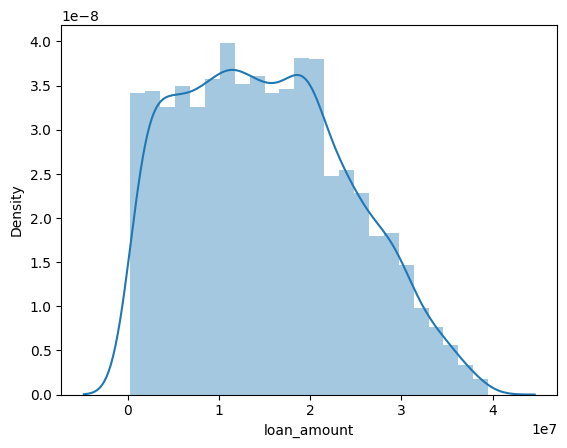

In [185]:
# Showing the distribution of "loan_amount" Column
sns.distplot(df['loan_amount'])

<ipython-input-186-2ef98741c70f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_term'])


<Axes: xlabel='loan_term', ylabel='Density'>

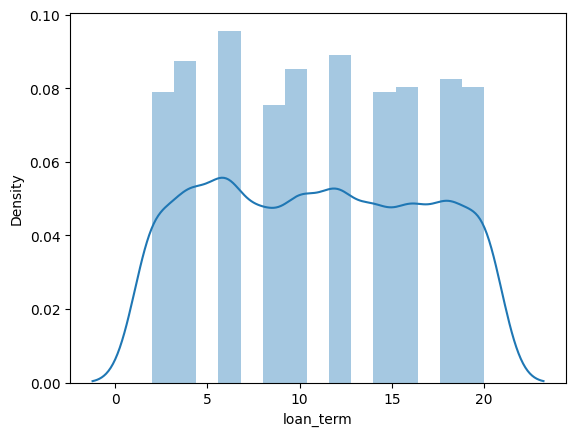

In [186]:
# Showing the distribution of "loan_term" Column
sns.distplot(df['loan_term'])

<ipython-input-187-eb909ad40e88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cibil_score'])


<Axes: xlabel='cibil_score', ylabel='Density'>

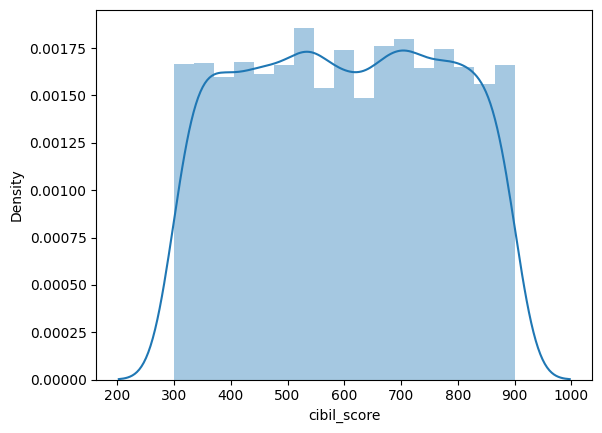

In [187]:
# Showing the distribution of "cibil_score" Column
sns.distplot(df['cibil_score'])

<ipython-input-188-43d02879b32c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residential_assets_value'])


<Axes: xlabel='residential_assets_value', ylabel='Density'>

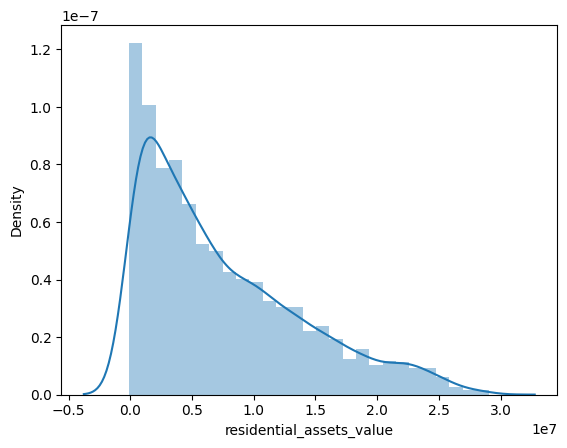

In [188]:
# Showing the distribution of "residential_assets_value" Column
sns.distplot(df['residential_assets_value'])

<ipython-input-189-e54353d35c6e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['commercial_assets_value'])


<Axes: xlabel='commercial_assets_value', ylabel='Density'>

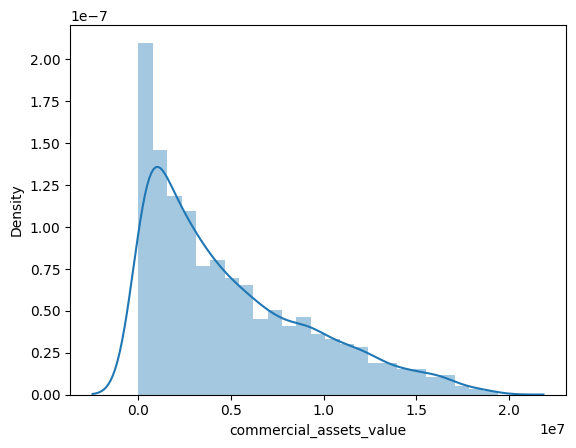

In [189]:
# Showing the distribution of "commercial_assets_value" Column
sns.distplot(df['commercial_assets_value'])

<ipython-input-190-8a2234f2b4d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_assets_value'])


<Axes: xlabel='luxury_assets_value', ylabel='Density'>

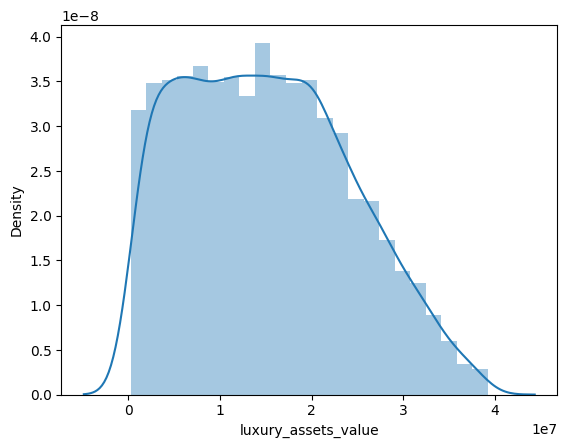

In [190]:
# Showing the distribution of "luxury_assets_value" Column
sns.distplot(df['luxury_assets_value'])

<ipython-input-191-7b6715c3b07b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bank_asset_value'])


<Axes: xlabel='bank_asset_value', ylabel='Density'>

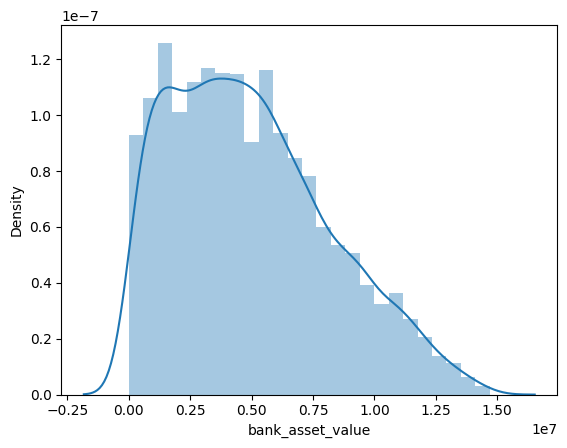

In [191]:
# Showing the distribution of "bank_asset_value" Column
sns.distplot(df['bank_asset_value'])

### **Scatter Plot**

no_of_dependents vs income_annum


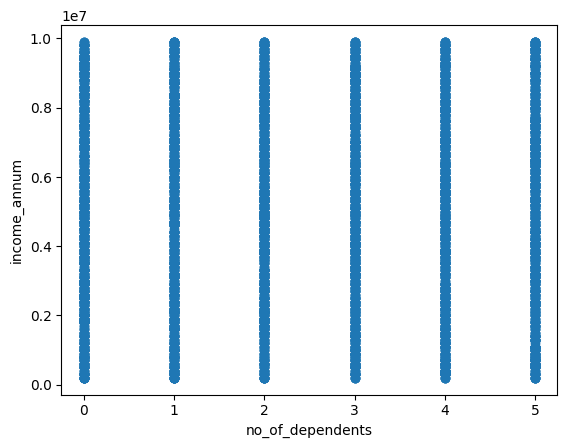



no_of_dependents vs loan_amount


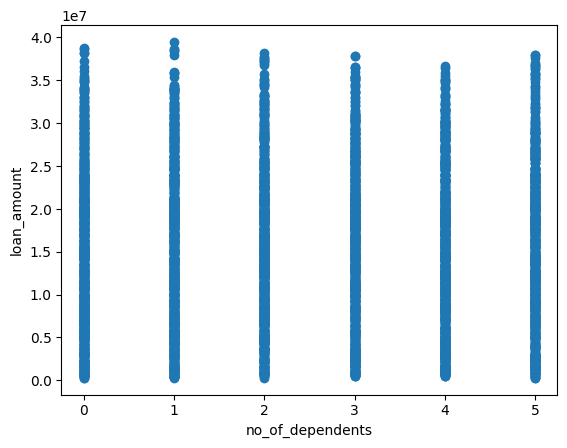



no_of_dependents vs loan_term


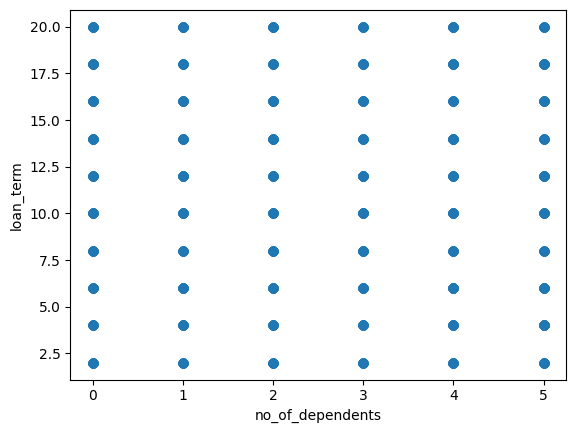



no_of_dependents vs cibil_score


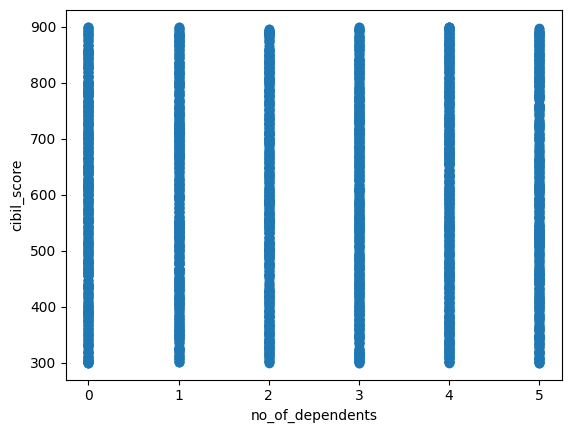



no_of_dependents vs residential_assets_value


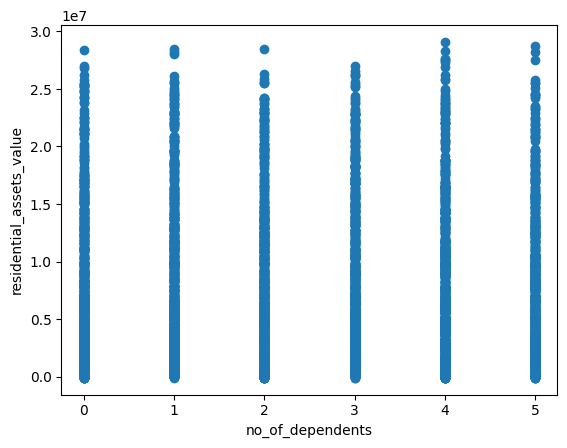



no_of_dependents vs commercial_assets_value


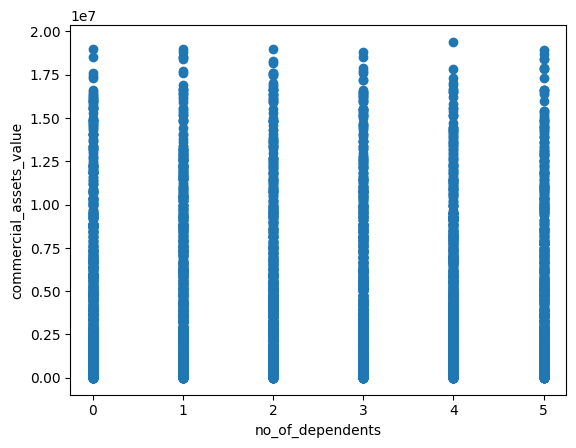



no_of_dependents vs luxury_assets_value


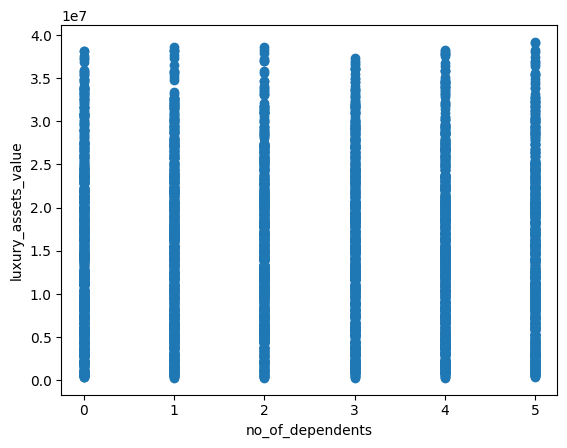



no_of_dependents vs bank_asset_value


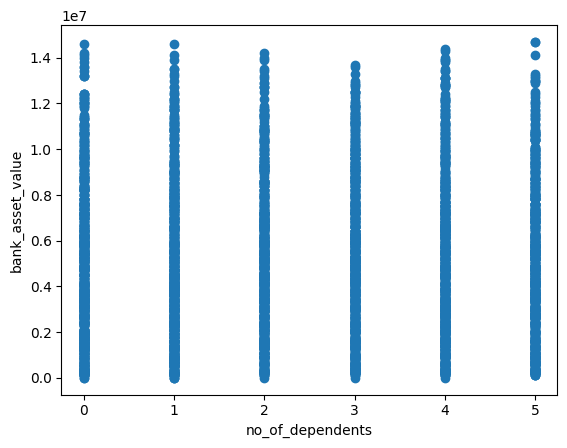



income_annum vs loan_amount


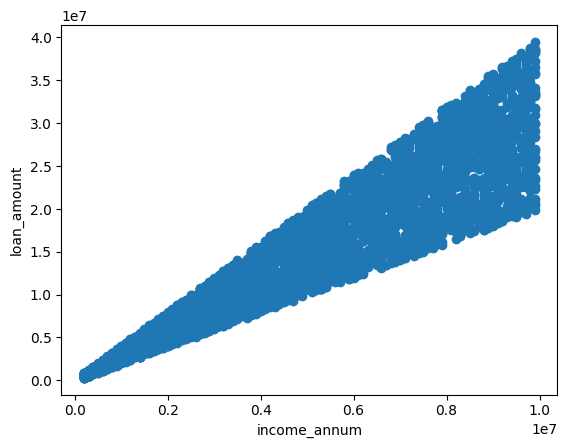



income_annum vs loan_term


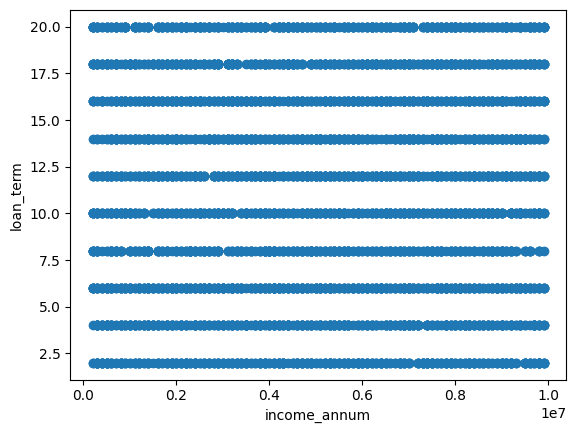



income_annum vs cibil_score


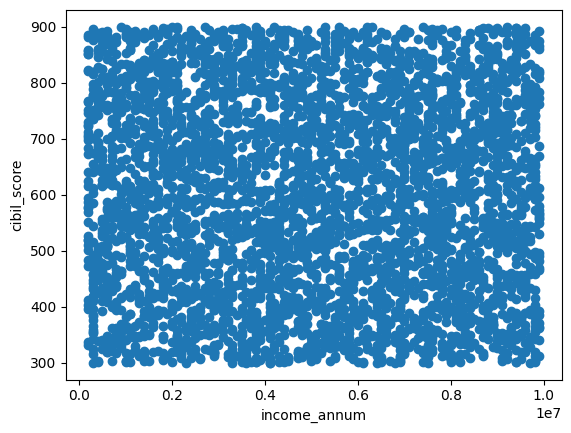



income_annum vs residential_assets_value


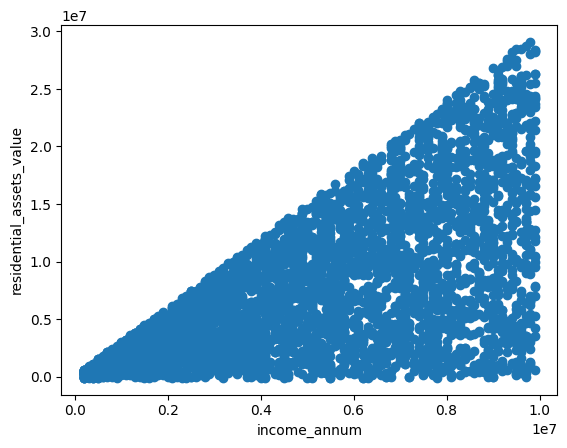



income_annum vs commercial_assets_value


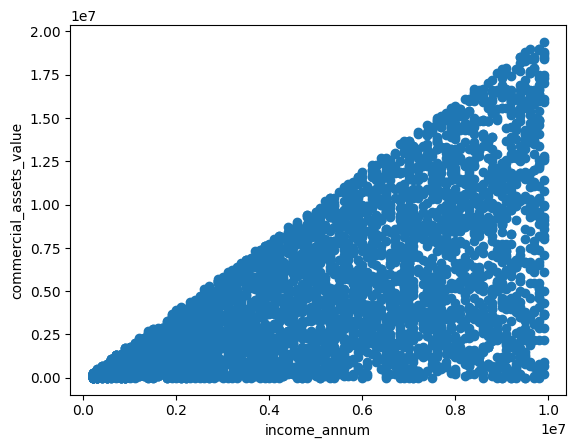



income_annum vs luxury_assets_value


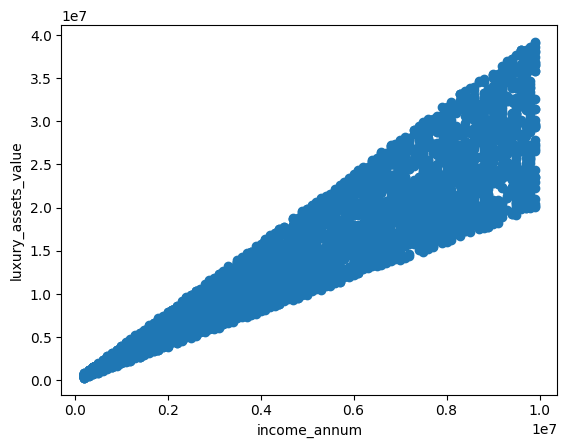



income_annum vs bank_asset_value


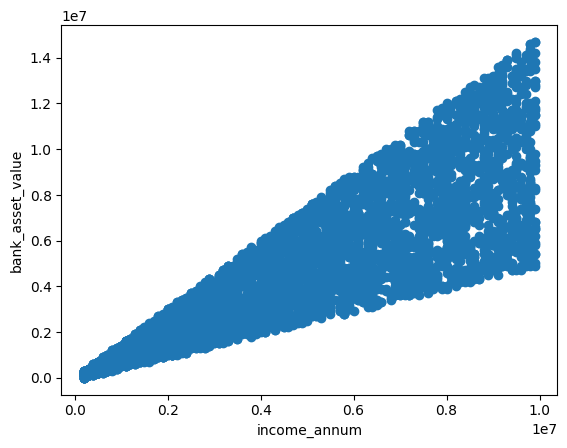



loan_amount vs loan_term


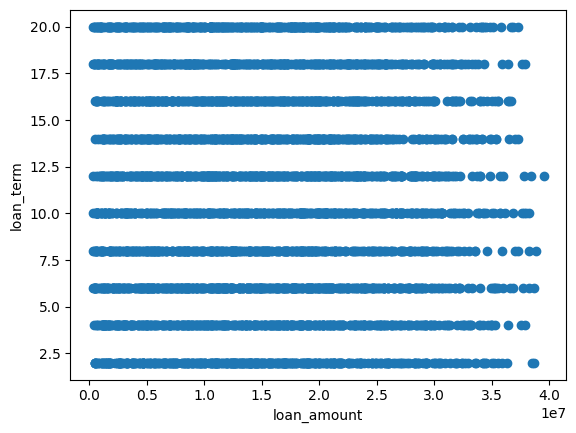



loan_amount vs cibil_score


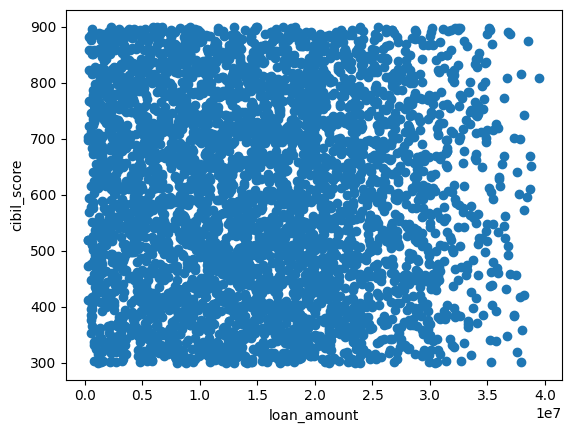



loan_amount vs residential_assets_value


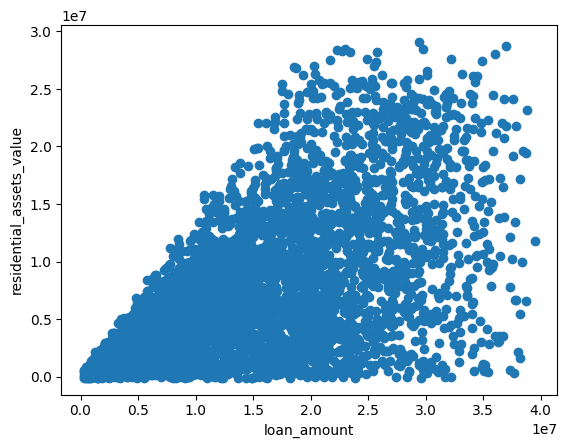



loan_amount vs commercial_assets_value


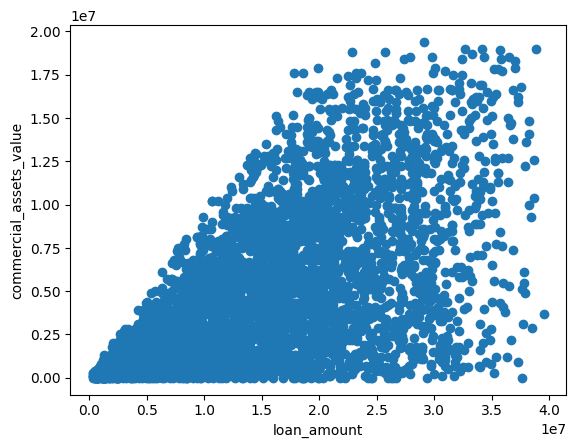



loan_amount vs luxury_assets_value


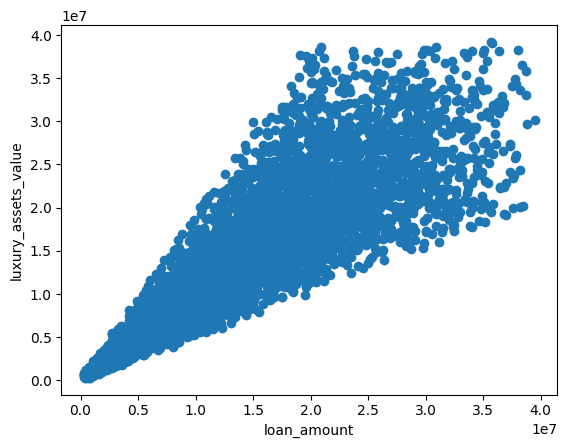



loan_amount vs bank_asset_value


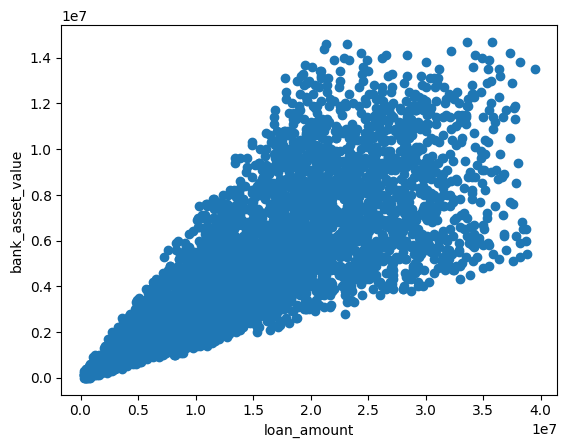



loan_term vs cibil_score


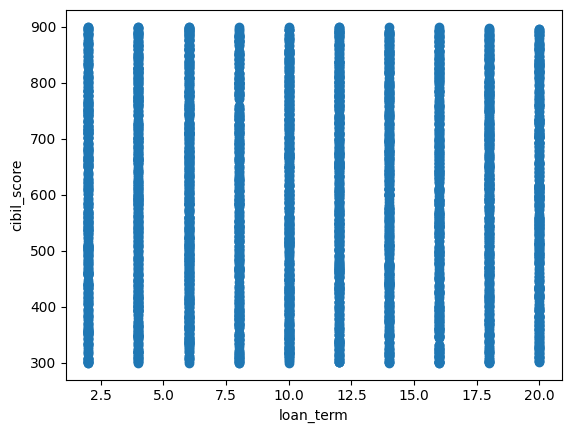



loan_term vs residential_assets_value


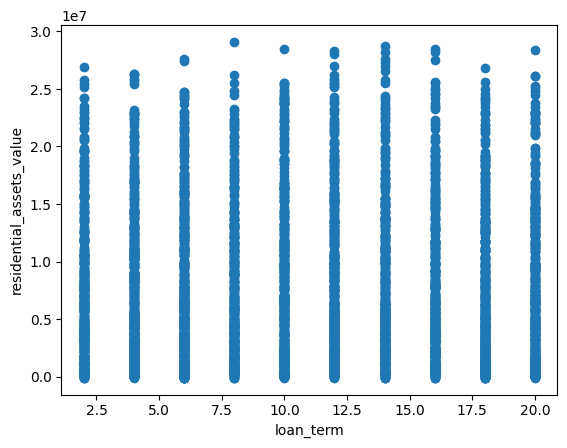



loan_term vs commercial_assets_value


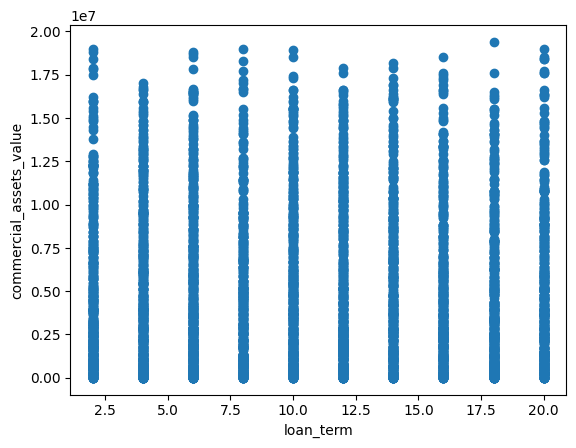



loan_term vs luxury_assets_value


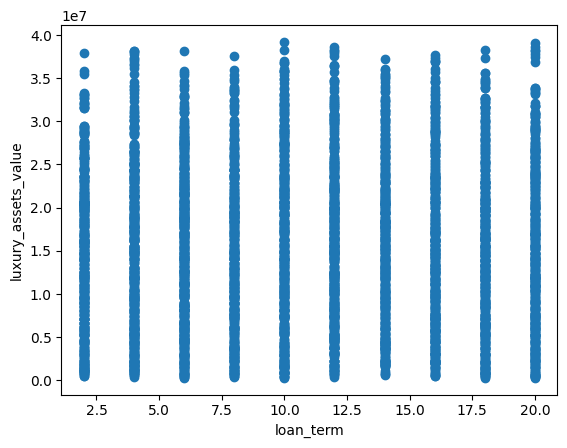



loan_term vs bank_asset_value


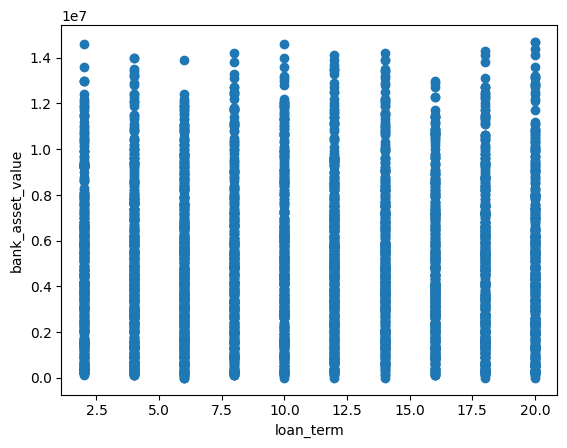



cibil_score vs residential_assets_value


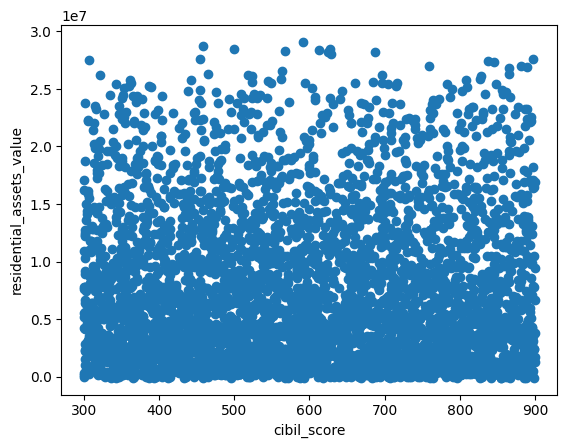



cibil_score vs commercial_assets_value


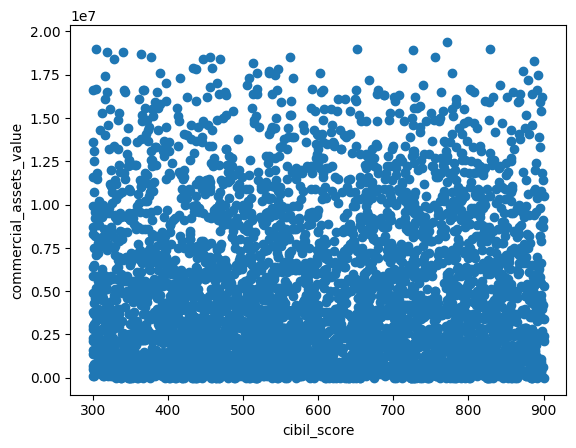



cibil_score vs luxury_assets_value


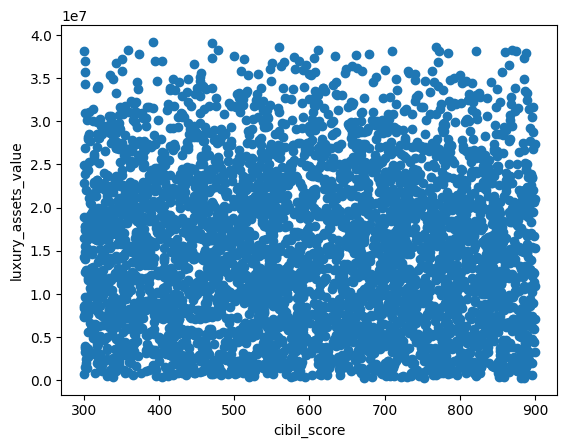



cibil_score vs bank_asset_value


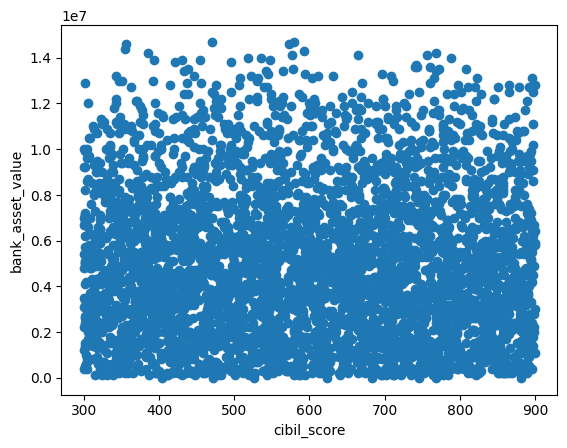



residential_assets_value vs commercial_assets_value


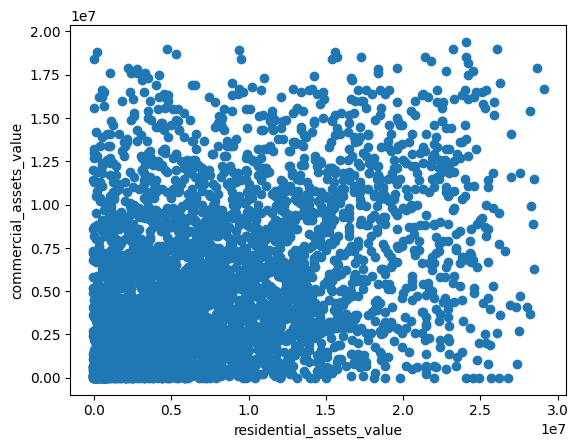



residential_assets_value vs luxury_assets_value


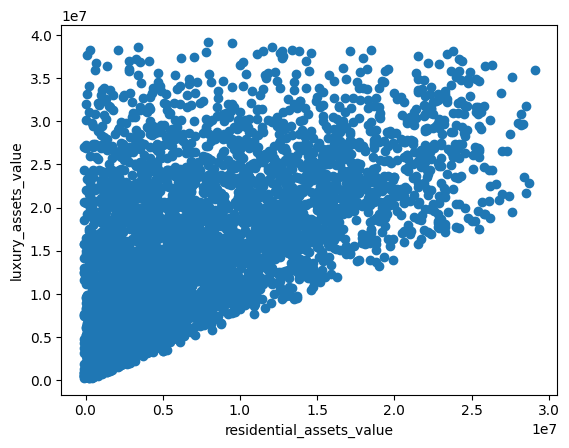



residential_assets_value vs bank_asset_value


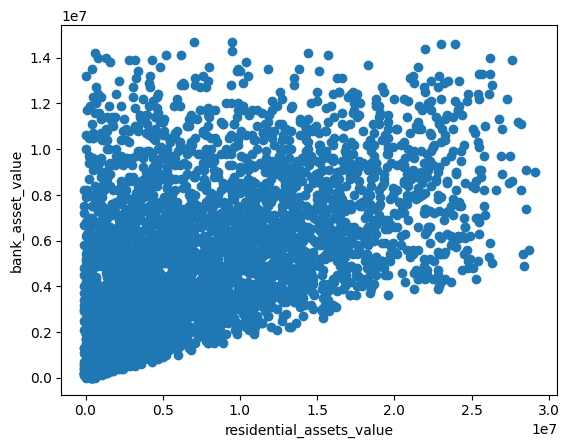



commercial_assets_value vs luxury_assets_value


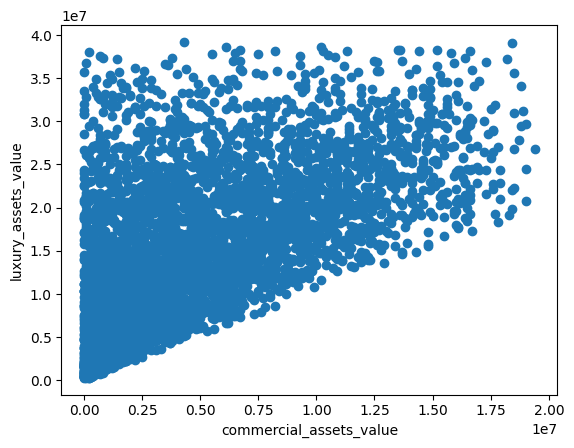



commercial_assets_value vs bank_asset_value


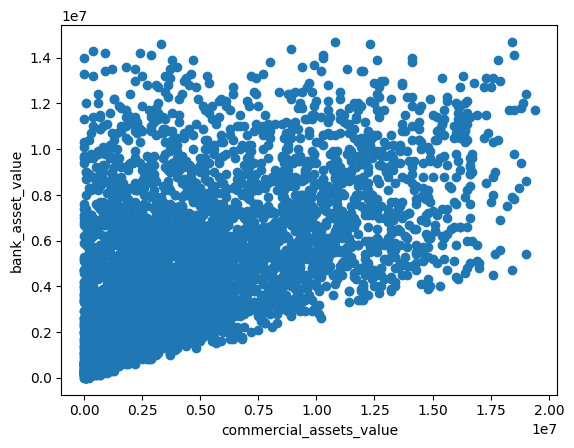



luxury_assets_value vs bank_asset_value


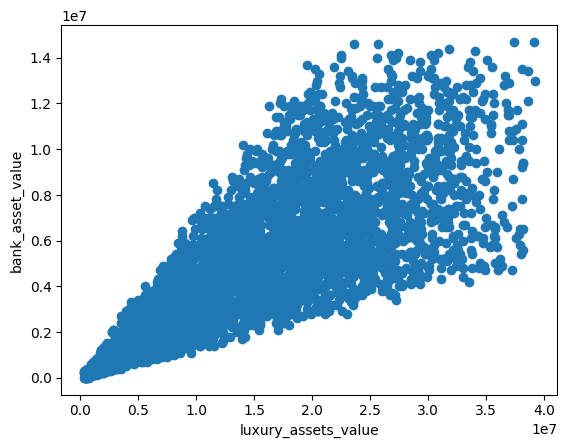

In [192]:
# For each pair of numerical variables, construct a scatter plot of the variables.
temp = []
for i in Numerical_Columns:
  for j in Numerical_Columns:
    if (i == j): continue
    temp.append(i)
    if (j in temp): continue
    print(i, "vs", j)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.scatter(x=df[i], y=df[j])
    plt.show()
    print("\n")

### **Correlation**

<ipython-input-193-3178a00895eb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


<Axes: >

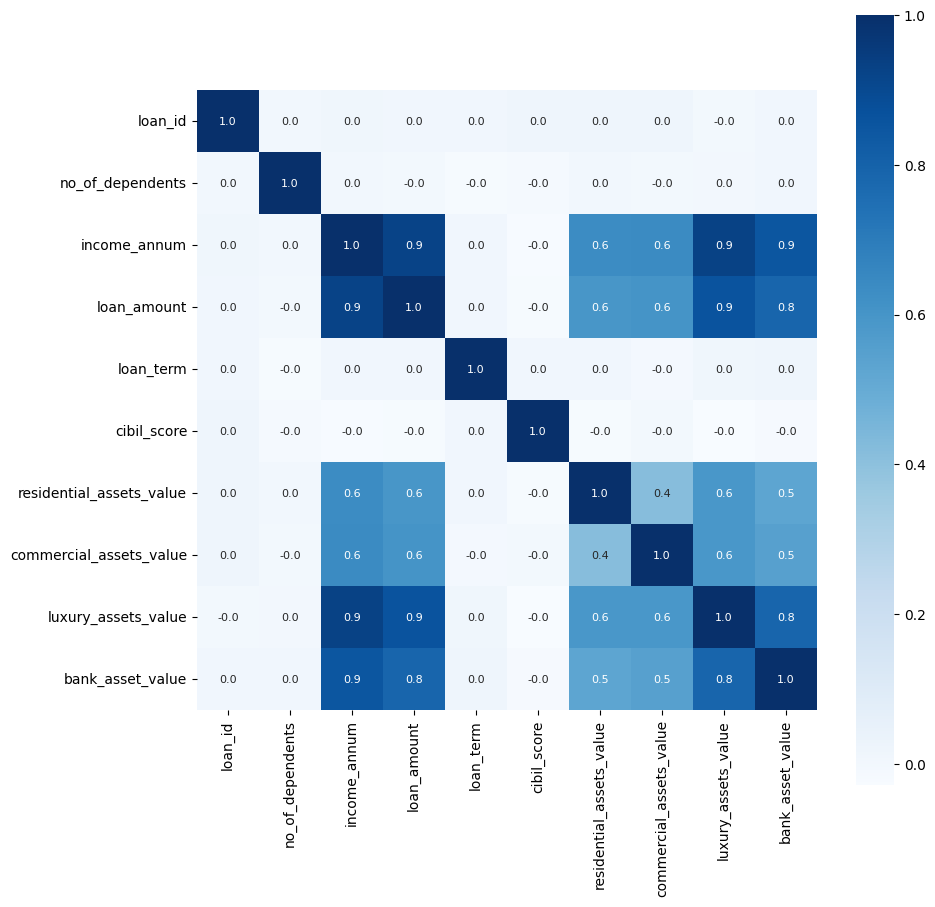

In [193]:
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

##**3. Processing missing values and/or outliers**

In [194]:
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

loan_id                     False
no_of_dependents            False
education                   False
self_employed               False
income_annum                False
loan_amount                 False
loan_term                   False
cibil_score                 False
residential_assets_value    False
commercial_assets_value     False
luxury_assets_value         False
bank_asset_value            False
loan_status                 False
dtype: bool


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


### **Using Box Plot to see Outliers**

In [195]:
print(Numerical_Columns)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


<Axes: >

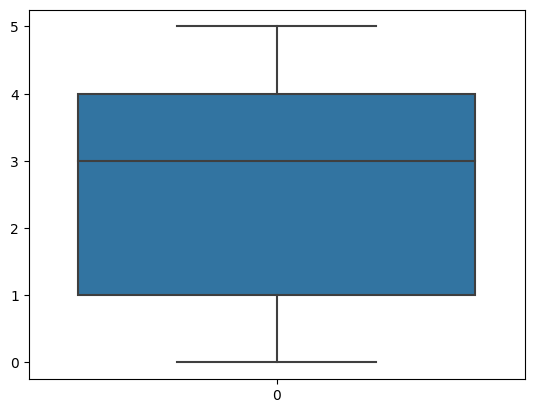

In [196]:
sns.boxplot(df['no_of_dependents'])

<Axes: >

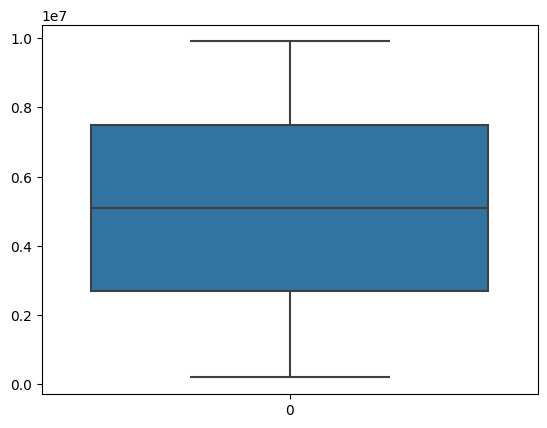

In [197]:
sns.boxplot(df['income_annum'])

<Axes: >

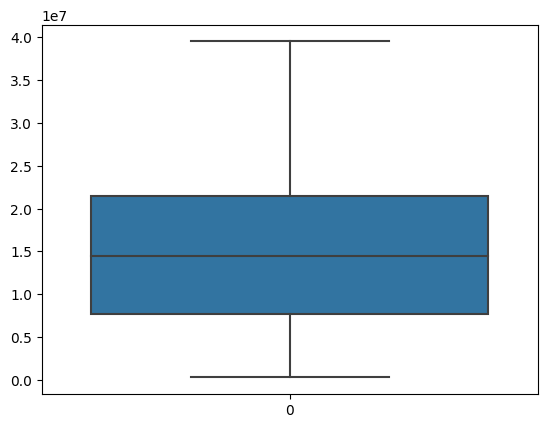

In [198]:
sns.boxplot(df['loan_amount'])

<Axes: >

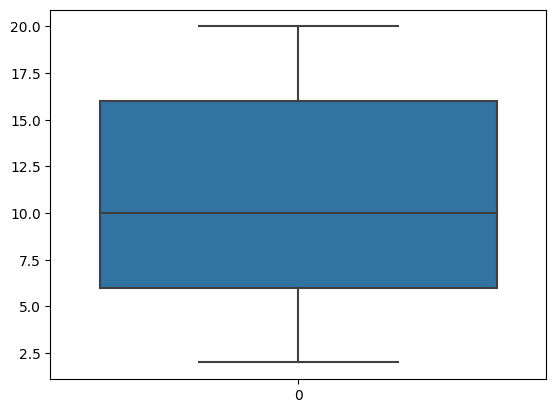

In [199]:
sns.boxplot(df['loan_term'])

<Axes: >

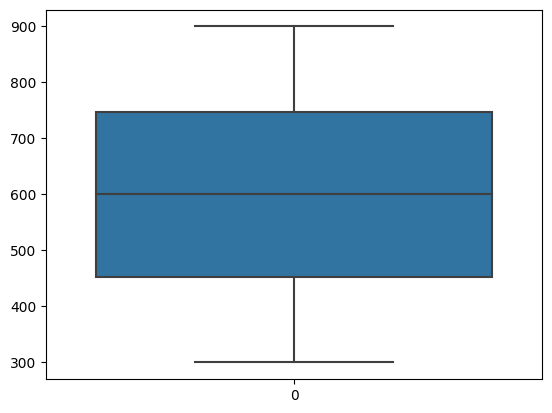

In [200]:
sns.boxplot(df['cibil_score'])

<Axes: >

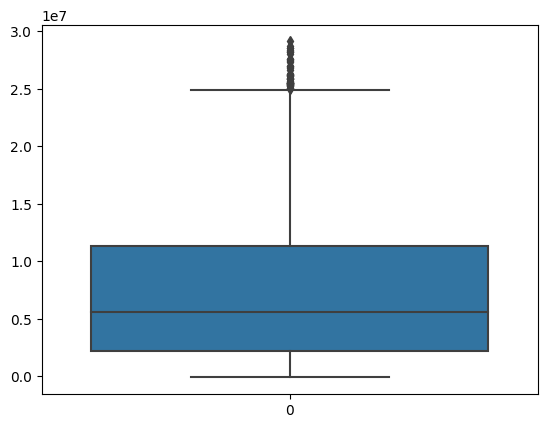

In [201]:
sns.boxplot(df['residential_assets_value'])
# มี outliers นิดหน่อย โดย outliers ยังมีค่าไม่สูงจากค่า Q3 + 1.5*IQR มากนัก

<Axes: >

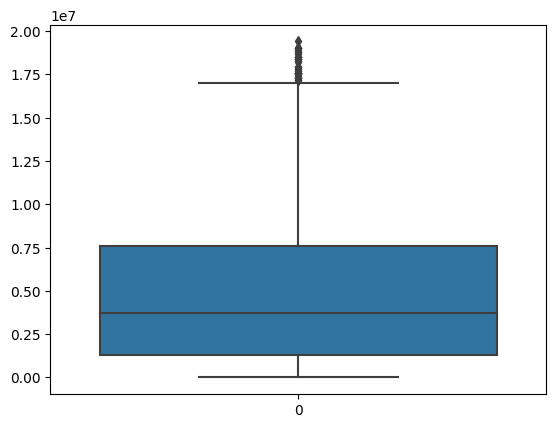

In [202]:
sns.boxplot(df['commercial_assets_value'])
# มี outliers นิดหน่อย โดย outliers ยังมีค่าไม่สูงจากค่า Q3 + 1.5*IQR มากนัก

<Axes: >

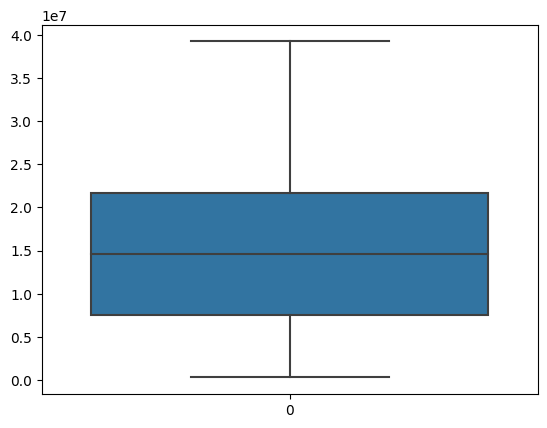

In [203]:
sns.boxplot(df['luxury_assets_value'])

<Axes: >

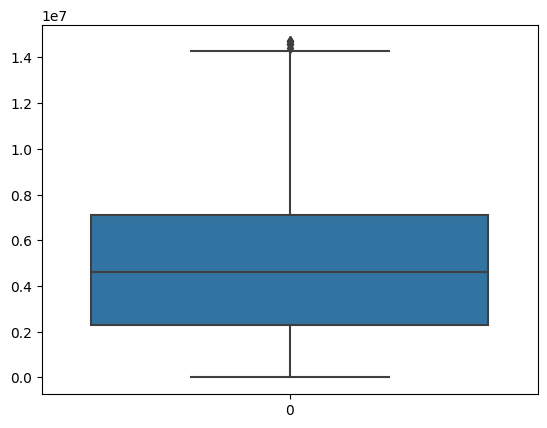

In [204]:
sns.boxplot(df['bank_asset_value'])
# มี outliers นิดหน่อย โดย outliers ยังมีค่าใกล้เคียงกับค่า Q3 + 1.5*IQR

In [205]:
for feature in df.columns:
  print("Column name:",feature)
  print(df[feature].value_counts())
  print("================")
  print()

Column name: loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: loan_id, Length: 4269, dtype: int64

Column name: no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64

Column name: education
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

Column name: self_employed
 Yes    2150
 No     2119
Name: self_employed, dtype: int64

Column name: income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: income_annum, Length: 98, dtype: int64

Column name: loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: loan_amount, Length: 378, dtype: int64

Column name: loan_term
6     490
12    456
4     447
10 

##**4 & 5. Processing categorical data or numerical data**

###**Transformation for Categorical to Numerical**

In [206]:
data = df.copy()

In [207]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [208]:
print(Categorical_Columns)

['education', 'self_employed', 'loan_status']


In [209]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in Categorical_Columns:
  if feature == 'loan_status': continue
  data[feature] = encoder.fit_transform(data[feature])

In [210]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


##**6. Train/Test splitting and Feature Scaling**

In [211]:
X = data.iloc[:, 1:-1].values # Don't include loan_id as it has no predictive power toward the target variable
Y = data.iloc[:, -1].values # All rows but only the last column (-1) => Y keeps the target variable (loan_status which is 1 or 0)

print(X)
print(Y)

[[       2        0        0 ... 17600000 22700000  8000000]
 [       0        1        1 ...  2200000  8800000  3300000]
 [       3        0        0 ...  4500000 33300000 12800000]
 ...
 [       2        1        0 ... 12400000 18100000  7300000]
 [       1        1        0 ...   700000 14100000  5800000]
 [       1        0        0 ... 11800000 35700000 12000000]]
[' Approved' ' Rejected' ' Rejected' ... ' Rejected' ' Approved'
 ' Approved']


###**Encoding the Dependent Variable (The Target Variable - loan_status)**

In [212]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
Y = encoder.fit_transform(Y)

print(Y)

[0 1 1 ... 1 0 0]


###**Splitting the dataset into the Training set and Test set**

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [214]:
print(X_train)

[[       0        0        0 ...  2800000 26200000  6100000]
 [       3        1        1 ...   900000 15600000  4900000]
 [       3        1        0 ... 13200000 18200000  3900000]
 ...
 [       5        1        0 ... 17900000 22800000  5600000]
 [       1        1        1 ...   500000  1500000   300000]
 [       1        0        1 ...  1100000 23400000 10200000]]


In [215]:
print(X_test)

[[       2        0        1 ... 15900000 27100000  7700000]
 [       0        1        0 ...  9200000 34100000 10000000]
 [       3        1        0 ...        0 18800000  9600000]
 ...
 [       1        0        1 ...  2400000  9300000  2000000]
 [       2        1        1 ...        0   500000        0]
 [       3        0        0 ...  1100000 18700000  5900000]]


In [216]:
print(Y_train)

[0 0 0 ... 1 0 0]


In [217]:
print(Y_test)

[1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 

###**Feature Scaling on Training Set & Test Set**

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [219]:
print(X_train)

[[-1.47338465 -0.98748678 -0.9944517  ... -0.49586718  1.22397114
   0.35767912]
 [ 0.29976532  1.01267179  1.00557925 ... -0.92961224  0.06071894
  -0.01216571]
 [ 0.29976532  1.01267179 -0.9944517  ...  1.87831636  0.34604495
  -0.32036973]
 ...
 [ 1.48186531  1.01267179 -0.9944517  ...  2.95126469  0.85085251
   0.2035771 ]
 [-0.88233466  1.01267179  1.00557925 ... -1.020927   -1.48662596
  -1.42990421]
 [-0.88233466 -0.98748678  1.00557925 ... -0.88395487  0.91669697
   1.62131561]]


In [220]:
print(X_test)

[[-0.29128467 -0.98748678  1.00557925 ...  2.49469093  1.32273783
   0.85080555]
 [-1.47338465  1.01267179 -0.9944517  ...  0.96516885  2.09092324
   1.5596748 ]
 [ 0.29976532  1.01267179 -0.9944517  ... -1.13507044  0.41188942
   1.43639319]
 ...
 [-0.88233466 -0.98748678  1.00557925 ... -0.58718193 -0.63064793
  -0.90595737]
 [-0.29128467  1.01267179  1.00557925 ... -1.13507044 -1.59636673
  -1.52236542]
 [ 0.29976532 -0.98748678 -0.9944517  ... -0.88395487  0.40091534
   0.29603831]]


In [221]:
# The End